In [1]:
%load_ext autoreload
%autoreload 2
import sys
if ".." not in sys.path:
    sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt
import json
from math import factorial

import signature.jax_signature.tensor_algebra_jax as ta

plt.rcParams["figure.figsize"]        = ((1 + np.sqrt(5)) / 2 * 6, 6)
plt.rcParams["figure.autolayout"]     = True
plt.rcParams["patch.force_edgecolor"] = False
plt.rcParams["axes.grid"]             = True

In [2]:
lam = 10
T = 10
n_grid = 10000
trunc = 5
dim = 2

T0 = -50
t_grid = np.unique(np.concatenate([np.linspace(T0, 0, n_grid), np.linspace(0, T, n_grid)]))

In [3]:
rng = np.random.default_rng(seed=42)
W = np.concatenate([[0], np.cumsum(rng.normal(size=len(t_grid) - 1) * np.sqrt(np.diff(t_grid)))])
path = np.vstack([t_grid, W]).T

In [5]:
%%time

StatSig = ta.path_to_stationary_signature(path=path, trunc=trunc, t_grid=t_grid, lam=lam)
StatSig2 = ta.path_to_stationary_signature(path=path, trunc=trunc, t_grid=t_grid, lam=1)

CPU times: total: 688 ms
Wall time: 959 ms


In [6]:
e = ta.AlgebraBasis(dim=dim, trunc=trunc)

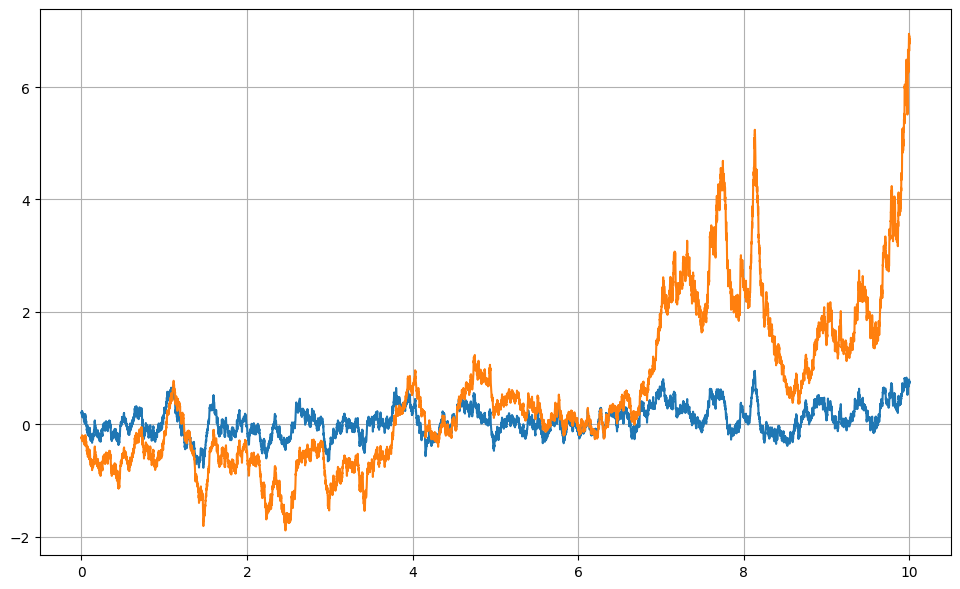

In [7]:
fig, ax = plt.subplots()

ax.plot(t_grid[t_grid >= 0], StatSig @ (e[2] + e[222] + 4 * factorial(5) * e[22222] * 0))
ax.plot(t_grid[t_grid >= 0], StatSig2 @ (e[2] + e[222]))

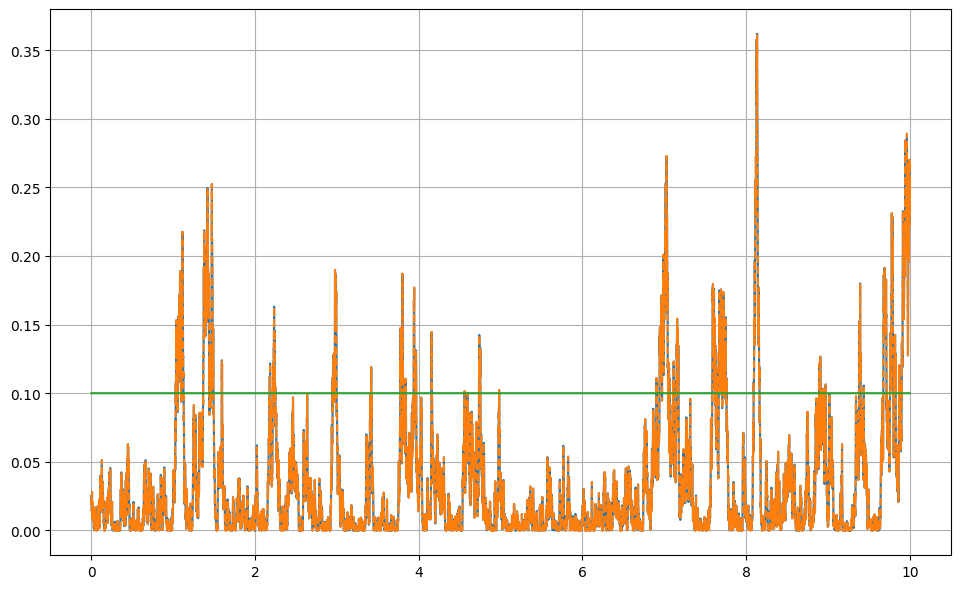

In [9]:
fig, ax = plt.subplots()

ax.plot(t_grid[t_grid >= 0], StatSig @ (e[22]))
ax.plot(t_grid[t_grid >= 0], (StatSig @ e[2]) ** 2 / 2, "--")
ax.plot(t_grid[t_grid >= 0], (StatSig @ e[1]))